## This is a hackish attempt to fight fear with information. Not add fear.
#### Definitions:
COVID-19 refers to the disease (coronavirus disease 2019). 

A more informative name would be: severe acute respiratory syndrome = SARS2 (2 because the related SARS virus emerged in 2002 from a completely different region of China (SW near Vietnam) via horseshoe bat --> civets --> meat market --> human.

SARS2 (SARS-CoV-2) broke out at in Wuhan China (~central), likely via bat --> pangolin --> meat market --> human.


### I added death rate trends from Spain so we can watch how different US counties "flatten" the curve by measures like shelter-in-place.
### These trends have NOT been officially peer reviewed and there are probably errors and oversights.
That said, I am getting the data from a reputable source (Johns Hopkins Corona virus Resource Center) and the code is in this repo for your review. 

### From the figure you can see that all US counties are well below last years flu death rate. So, what's the big deal?
 - I added a projection of what happened in Spain (and continues to happen) and you can see that within a few weeks, we could be well above typical flu death rates. 
** Based on Long Island (Suffolk county), which is among the hardest hit areas in the US, it is already clear that California counties are going to be better off than Spain. This could be because shelter-in-place measures were imposed relatively early in the outbreak.
Thus, the trends in CA counties are likely going to less extreme. By next week (~April 7), we should be able to make better predictions about how this is progressing in each region.

### Why am I plotting death rate in Suffolk county?  
- NY state has relatively high incidence of SARS2 and NY county (or borough) has the highest numbers, but Suffolk county in Long Island is nearby and a more typical county.

### Why am I only plotting deaths and not cases?
#### - I am guessing that the death numbers are less impacted by regional differences in testing rates and deaths kinda don't go unreported. 

### Why did I use Spain for a reference?
#### - I think Spain is the worst case scenario. I could have used italy, but the global death numbers are only by country, and Northern and Southern Italy's death rates are very different. 



/Users/bradleymain/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/bradleymain/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


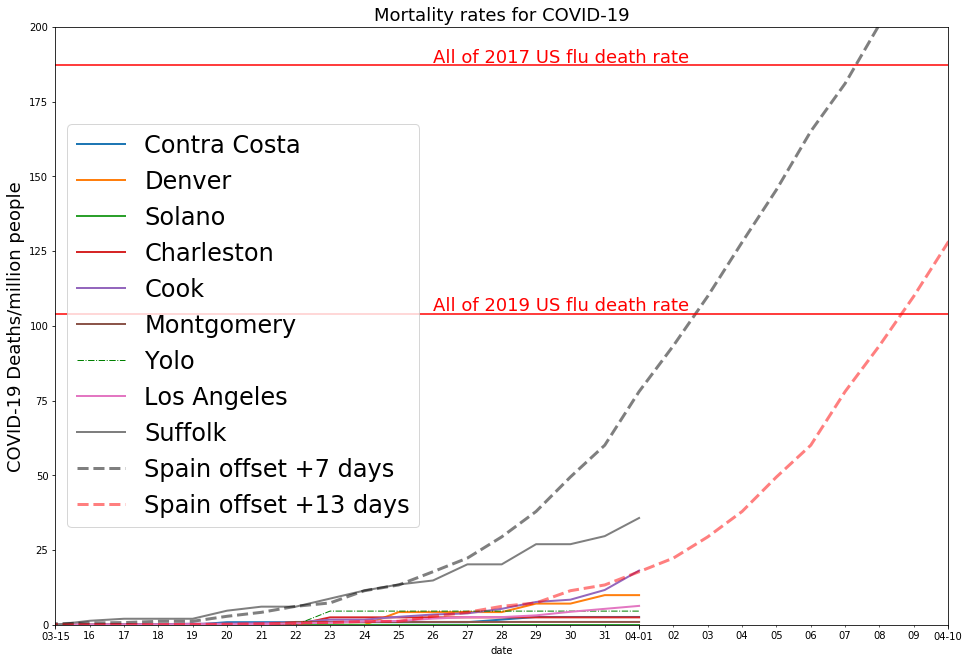

In [13]:
"""
workflow for comparing COVID-19 death rate data
"""
#### Standard workflow imports ###################################### 
import pandas as pd
import sys
import matplotlib.pyplot as P
from matplotlib.dates import DateFormatter
import input_urls # input_urls.py should be in your directory with paths to csv files.
%matplotlib inline  
#### End standard workflow imports ###################################

######## INPUT THE mortality and population size data ########
US_deaths = pd.read_csv(input_urls.us_death_url)
global_deaths = pd.read_csv(input_urls.global_death_url)

# pop sizes
cook_pop = 5238216
LA_pop = 10118759
yolo_pop = 218376
mont_pop = 1048244
charles_pop = 401738
cc_pop = 1144863
solano_pop = 443877
denver_pop = 705439
suffolk_pop = 1483571
spain_pop = 46750000

######## End of INPUTS #########

####### functions #########
def make_COUNTRY_DF(global_death_DF, country_name, pop_size,NAME,offset):
    country_df = global_death_DF.loc[global_death_DF['Country/Region']==country_name].copy()
    country_df.drop(['Province/State','Lat','Long'],axis='columns',inplace=True)
    country_df = country_df.T.reset_index()
    country_df.columns = ['date',country_name]
    country_df.drop(country_df.index[0],inplace=True)
    country_df = country_df.reset_index(drop=True)
    country_df['date']=pd.to_datetime(country_df['date'])
    country_df['date'] = country_df['date'] + pd.DateOffset(days=offset)
    country_df[country_name] = country_df[country_name].div(pop_size) * 1000000
    country_df = country_df.set_index('date')
    country_df.columns = [NAME]
    return(country_df)


def make_county_DF(US_death_DF, state, county_name, pop_size):
    COUNTY = US_death_DF.loc[(US_death_DF['Province_State']==state) & (US_death_DF['Admin2']==county_name)].copy()
    COUNTY.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2','Country_Region', 'Lat', 'Long_', 'Combined_Key','Population'],axis='columns',inplace=True)
    COUNTY = COUNTY.T.reset_index()
    COUNTY.columns = ['date',county_name]
    COUNTY.drop(COUNTY.index[0],inplace=True)
    #if county_name == "Suffolk":  # Sometimes I want to add more recent data and do that here.
    #    new_row = {'date':'4/02/20', 'Suffolk':69}
    #    COUNTY = COUNTY.append(new_row, ignore_index=True)
    COUNTY = COUNTY.reset_index(drop=True)
    COUNTY['date']=pd.to_datetime(COUNTY['date'])
    COUNTY[county_name] = COUNTY[county_name].div(pop_size) * 1000000
    COUNTY = COUNTY.set_index('date')
    return(COUNTY)

####### end of functions #########

####### Select focal counties to compare ##########
# Later I will update this to a one liner: importing a list of counties and population size data
CC_deaths = make_county_DF(US_deaths,"California", "Contra Costa",cc_pop)
solano_deaths = make_county_DF(US_deaths,"California", "Solano",solano_pop)
yolo_deaths = make_county_DF(US_deaths,"California","Yolo",yolo_pop)
LA_deaths = make_county_DF(US_deaths,"California", "Los Angeles",LA_pop)
Mont_deaths = make_county_DF(US_deaths,"Maryland", "Montgomery",mont_pop)
SC_deaths = make_county_DF(US_deaths,"South Carolina", "Charleston",charles_pop)
Chi_deaths = make_county_DF(US_deaths,"Illinois", "Cook",cook_pop)
denver_deaths = make_county_DF(US_deaths,"Colorado", "Denver",denver_pop)
suffolk_deaths = make_county_DF(US_deaths,"New York", "Suffolk",suffolk_pop)
espania_deaths = make_COUNTRY_DF(global_deaths, "Spain", spain_pop, "Spain offset +7 days",7)
espania_deaths14 = make_COUNTRY_DF(global_deaths, "Spain", spain_pop, "Spain offset +13 days",13)

# Add rate of Flu deaths from the exceptionally high 2017-2018 flu season
flu_2019 = 34200  # 2018-2019 flue season. cdc: https://www.cdc.gov/flu/about/burden/2018-2019.html
flue_2017 = 61000
us_pop_19 = 329450000 # 2019
us_pop_17 = 325700000 # 2017
us_flu_deaths_per_million_19 = 1000000 * (flu_2019/us_pop_19)  # flu deaths per million people
us_flu_deaths_per_million_17 = 1000000 * (flue_2017/us_pop_17)  # flu deaths per million people
#print("flue death rate 2019:",us_flu_deaths_per_million)


################## make figure ###############
fig = P.figure(figsize=(16,11)) # create a figure object
ax = fig.add_subplot(1, 1, 1)  # create an axes object in the figure


line_w = 2
CC_deaths.plot(kind='line',ax=ax,lw=line_w)
denver_deaths.plot(kind='line',ax=ax,lw=line_w)
solano_deaths.plot(kind='line',ax=ax,lw=line_w)
SC_deaths.plot(kind='line',ax=ax,lw=line_w)
Chi_deaths.plot(kind='line',ax=ax,lw=line_w)
Mont_deaths.plot(kind='line',ax=ax,lw=line_w)

yolo_deaths.plot(kind='line',ax=ax,lw=1,ls="-.",color='g')
LA_deaths.plot(kind='line',ax=ax,lw=line_w)
suffolk_deaths.plot(kind='line',ax=ax,lw=line_w)
espania_deaths.plot(kind='line',ax=ax,lw=3,ls='--',color='k',alpha=0.5)
espania_deaths14.plot(kind='line',ax=ax,lw=3,ls='--',color='r',alpha=0.5)

# add flu death comparison
P.axhline(y=us_flu_deaths_per_million_19, color='r', linestyle='-')
P.text('3/26/2020',105,"All of 2019 US flu death rate",color='r',fontsize=18)
P.axhline(y=us_flu_deaths_per_million_17, color='r', linestyle='-')
P.text('3/26/2020',188,"All of 2017 US flu death rate",color='r',fontsize=18)

ax.set_title("Mortality rates for COVID-19",fontsize=18)
ax.set_ylabel("COVID-19 Deaths/million people",fontsize=18)

P.xlim('3/15/20','4/10/20')
P.ylim(0,200)

# Define the date format
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
P.legend(prop={'size': 24})
#P.savefig(input_urls.outfile)
P.show()

##############################################